<a href="https://colab.research.google.com/github/Fredooooooo/JSC270_Assg2/blob/new_branch/JSC270_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Libraries

In [137]:
import pandas as pd
import numpy as np
import scipy.stats as sci
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.weightstats import DescrStatsW
import statsmodels.formula.api as smf
import io

###Importing data

In [103]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',  sep = ', ', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']
income94.head

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


<bound method NDFrame.head of        age         workclass  ...  native_country gross_income_group
0       39         State-gov  ...   United-States              <=50K
1       50  Self-emp-not-inc  ...   United-States              <=50K
2       38           Private  ...   United-States              <=50K
3       53           Private  ...   United-States              <=50K
4       28           Private  ...            Cuba              <=50K
...    ...               ...  ...             ...                ...
32556   27           Private  ...   United-States              <=50K
32557   40           Private  ...   United-States               >50K
32558   58           Private  ...   United-States              <=50K
32559   22           Private  ...   United-States              <=50K
32560   52      Self-emp-inc  ...   United-States               >50K

[32561 rows x 15 columns]>

In [104]:
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [132]:
income94.education_num.sort_values()

22940     1
13248     1
21370     1
25943     1
21388     1
         ..
10647    16
12074    16
28758    16
4597     16
15708    16
Name: education_num, Length: 32561, dtype: int64

### See what sign is used to denote missing values

In [105]:
income94.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

### Replace ? with NaN

In [106]:
income94 = income94.replace('?', np.nan)
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           30725 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          30718 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      31978 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [107]:
income94.isna().sum()

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

### Plot and transformation
From the histogram of the capital_gain, we find that most of them are 0 capital_gain. In this case, applying a log transformation only help to spread out those values larger than zero a bit. Since most values are 0, it's not necessary to apply the transformation.\
Similarly, the distribution of capital_loss also shows that most of the capital_loss are 0s. And in this case, applying a log transformation can't help to make them more evenly distributed. Therefore, we don't need to do transformations.


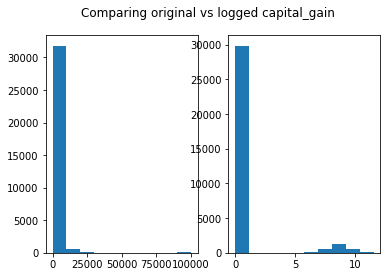

In [108]:
fig, (plt1, plt2) = plt.subplots(1, 2)
fig.suptitle('Comparing original vs logged capital_gain')
plt1.hist(income94.capital_gain)
plt2.hist(np.log(income94.capital_gain + 1))
fig.show()

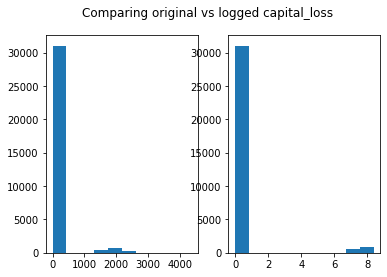

In [109]:
fig, (plt1, plt2) = plt.subplots(1, 2)
fig.suptitle('Comparing original vs logged capital_loss')
plt1.hist(income94.capital_loss)
plt2.hist(np.log(income94.capital_loss + 1))
fig.show()

### Distribution of fnlwgt
As the graph shown below, the data is not symmetrically distributed. It is right-skewed.
When comparing the fnlwgt of male and female, I find that they have similar trends. Both of them are right-skewed, but the fnlwgt for male are generally 2 times the fnlwgt for female.

In [110]:
income94.fnlwgt.sort_values()

17096      12285
27207      13769
25743      14878
24012      18827
10826      19214
          ...   
8258     1226583
15569    1268339
16739    1366120
18138    1455435
14449    1484705
Name: fnlwgt, Length: 32561, dtype: int64

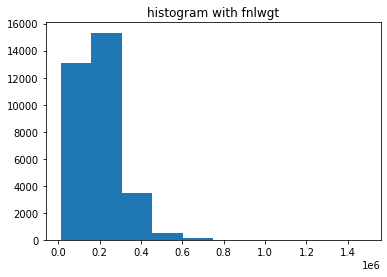

In [111]:
plt.hist(income94.fnlwgt)
plt.title("histogram with fnlwgt")
plt.show()

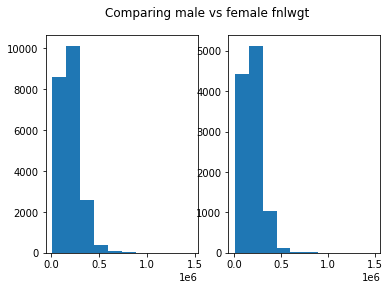

In [112]:
male = income94[income94.sex == "Male"]
female = income94[income94.sex == "Female"]
fig, (plt1, plt2) = plt.subplots(1, 2)
fig.suptitle('Comparing male vs female fnlwgt')
plt1.hist(male.fnlwgt)
plt2.hist(female.fnlwgt)
fig.show()

### Deal with outliers and replace them with missing values

In [113]:
def get_outliers(num_var, df):
  '''Get outliers based on whiskers from 
  boxplot.
  Input - num_var: A string representing the v
  variable of interest
  df: The pd df containing the numerical data
  Output: A pd df containing the outlier obs
  '''
  # Capture 1st and 3rd quartiles
  firstquart = df[num_var].quantile(q=0.25)
  thirdquart = df[num_var].quantile(q=0.75)
  # Generate IQR
  iqr = thirdquart - firstquart
  # Generate Whiskers
  lower_whisker = firstquart - 1.5*iqr
  upper_whisker = thirdquart + 1.5*iqr
  # Gen outlier df
  outliers = df[(df[num_var] > upper_whisker) | (df[num_var] < lower_whisker)]
  print('The variable {} has {} outliers'.format(num_var, len(outliers)))
  return outliers

outliers = get_outliers('fnlwgt', income94)
income94['fnlwgt'].loc[outliers.index] = np.nan

The variable fnlwgt has 992 outliers
The variable fnlwgt has 326 outliers


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
89,43,Federal-gov,410867.0,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
200,26,Private,397317.0,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,1876,40,United-States,<=50K
317,22,Private,399087.0,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Other-relative,White,Female,0,0,40,Mexico,<=50K
364,22,Private,410439.0,HS-grad,9,Married-spouse-absent,Sales,Not-in-family,White,Male,0,0,55,United-States,<=50K
444,27,Private,405855.0,9th,5,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,49,Private,402462.0,Bachelors,13,Married-spouse-absent,Transport-moving,Unmarried,White,Male,0,0,30,Columbia,<=50K
31842,42,Private,402367.0,Some-college,10,Married-civ-spouse,Transport-moving,Husband,Black,Male,7688,0,45,United-States,>50K
32250,43,Private,409922.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,50,United-States,>50K
32494,82,NaN,403910.0,HS-grad,9,Never-married,NaN,Not-in-family,White,Male,0,0,3,United-States,<=50K


### Correlation between Age, education_num, and hours_per_week

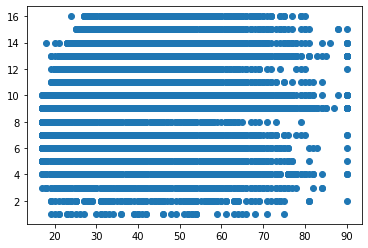

Pearsons correlation: 0.037


In [127]:
plt.scatter(income94.age, income94.education_num)
plt.show()

corr, _ = sci.pearsonr(income94.age, income94.education_num)
print('Pearsons correlation: %.3f' % corr)

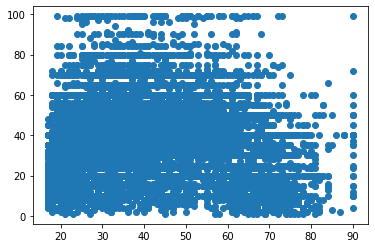

Pearsons correlation: 0.069


In [128]:
plt.scatter(income94.age, income94.hours_per_week)
plt.show()
corr, _ = sci.pearsonr(income94.age, income94.hours_per_week)
print('Pearsons correlation: %.3f' % corr)

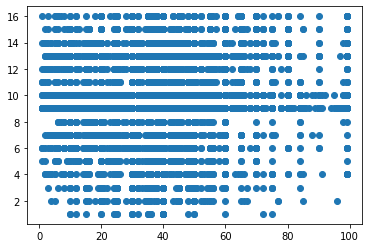

Pearsons correlation: 0.148


In [129]:
plt.scatter(income94.hours_per_week, income94.education_num)
plt.show()
corr, _ = sci.pearsonr(income94.hours_per_week, income94.education_num)
print('Pearsons correlation: %.3f' % corr)

a). By drawing the scatter plot of three pairs of these variables, I discovered that hours_per_week and education_num are the only pair appears to be correlated. \
b). After calculating the correaltion, the other two pair all have their correlation coefficient smaller than |0.1|, while the pair of hours_per_week and education)num are the only one with a correlaton coefficient larger than |0.1|. This is also what I was expected, since the scatter plot of the third pair does show a slightly positive relationship. \


In [130]:
corr1, _ = sci.pearsonr(male.age, male.education_num)
print('Pearsons correlation for male: %.3f' % corr1)
corr2, _ = sci.pearsonr(female.age, female.education_num)
print('Pearsons correlation for female: %.3f' % corr2)

Pearsons correlation for male: 0.060
Pearsons correlation for female: -0.018


c). From the result correalation, we could find that older male may tend to have more educational experience, while older female may tend to have less educational experience. However, both relationships are not strong since the coefficient is less than |0.1|. This is not what I was expected though. I think such difference between male and female may due to the gender inequality in the past years. Those older male had a longer education when they are young compared with female of the same age.

In [154]:
# def weighted_variance(values, weights):
#   average = np.average(values, weights=weights)
#   # Fast and numerically precise:
#   variance = np.average((values-average)**2, weights=weights)
#   return (variance)

# obtain a 2d array used to calculate covariance.
df = income94[income94.fnlwgt.isna() == False]
df1 = df[["education_num", "hours_per_week"]]
arr = df1.to_numpy()
# Obtain weights
df2 = df["fnlwgt"]
weights = df2.to_numpy()
# Calculate weighted covariance
ds = DescrStatsW(arr, weights=weights)
# edu_variance = weighted_variance(df["education_num"].to_numpy(), weights)
print ("the weighted covariance:")
print (ds.cov)
print ("the unweighted covariance")
print (np.cov(df.education_num, df.hours_per_week))

the weighted covariance:
[[  6.72779844   4.6754599 ]
 [  4.6754599  147.62081729]]
the unweighted covariance
[[  6.57143182   4.73043009]
 [  4.73043009 153.09036608]]


d). As shown above, the weighted variance of education_num and the weighted variance of unweighted variance of 